# Wine Quality Analysis

you have two features as citrus acid content and Density of wine

you have to calculate the quality by using the formula

citrus acid content can be in range (1 to 5)

density of wine can be in range(9930 to 9970)

quality=0.0015x (var1/var2)

plot the KNN graph and predict the quality of wine

quality range   wine status

5-6.5           Normal

6.5-8           Good  

8-10            best

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [18]:
np.random.seed(50)
var1 = np.random.randint(1,5,200)
var2 = np.random.randint(9930,9970,200)
Quality=15000*(var1/var2)
   
    
def category(Quality):
    Quality=float(Quality)
    if Quality<=6.5 and Quality>5:
        return "Normal"
    elif Quality<=8 and Quality>6.5:
        return "Good"
    elif Quality<=10 and Quality>8:
        return "Best"
    else:
        return "Low"
    
category = np.array([category(b) for b in Quality])
Quality=pd.DataFrame({"Citrus":var1, "Density":var2, "Wine Quality":Quality, "Category":category})
Quality


,Citrus,Density,Wine Quality,Category
0,1,9931,1.510422,Low
1,1,9967,1.504966,Low
2,4,9943,6.034396,Normal
3,2,9965,3.010537,Low
4,2,9944,3.016895,Low
...,...,...,...,...
195,1,9961,1.505873,Low
196,1,9947,1.507992,Low
197,3,9967,4.514899,Low
198,1,9965,1.505268,Low


In [8]:
L_C = LabelEncoder()
Quality["Category"]=L_C.fit_transform(Quality["Category"])
Quality

,Citrus,Density,Wine Quality,Category
0,1,9931,1.510422,0
1,1,9967,1.504966,0
2,4,9943,6.034396,1
3,2,9965,3.010537,0
4,2,9944,3.016895,0
...,...,...,...,...
195,1,9961,1.505873,0
196,1,9947,1.507992,0
197,3,9967,4.514899,0
198,1,9965,1.505268,0


In [11]:
X=Quality[["Citrus","Density"]]
Y=Quality["Category"]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

In [13]:
print(X_train,X_train,Y_train,Y_test)

     Citrus  Density
114       3     9937
187       4     9935
76        3     9935
122       1     9965
142       3     9969
..      ...      ...
132       1     9959
33        1     9965
109       4     9940
139       2     9954
176       2     9958

[140 rows x 2 columns]      Citrus  Density
114       3     9937
187       4     9935
76        3     9935
122       1     9965
142       3     9969
..      ...      ...
132       1     9959
33        1     9965
109       4     9940
139       2     9954
176       2     9958

[140 rows x 2 columns] 114    0
187    1
76     0
122    0
142    0
      ..
132    0
33     0
109    1
139    0
176    0
Name: Category, Length: 140, dtype: int32 112    0
165    0
12     0
73     0
144    1
20     1
199    1
8      0
39     1
88     0
81     0
197    0
69     0
160    1
25     0
99     0
151    0
23     0
138    0
159    1
89     1
82     0
24     0
174    0
137    1
83     1
107    0
34     0
97     0
167    0
123    0
157    0
75     0
152    1
1

In [14]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

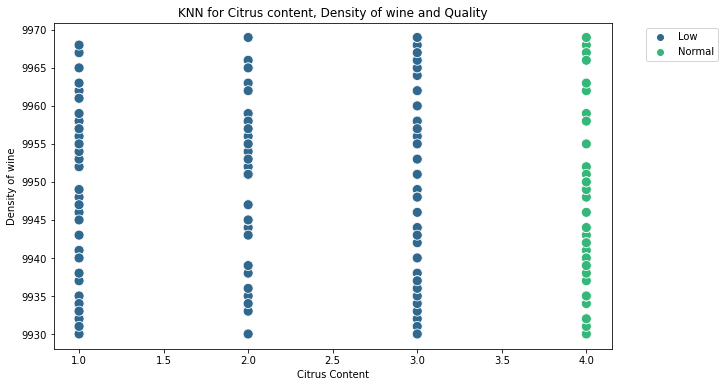

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X,x=var1,y=var2,hue=L_C.inverse_transform(Y),palette = "viridis", s=100)
plt.title("KNN for Citrus content, Density of wine and Quality")
plt.xlabel("Citrus Content")
plt.ylabel("Density of wine")
plt.legend(loc="upper right", bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()